In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [34]:
file_path = "/Users/cadenmyers/billingelab/dev/skyrmion_lattices/experimental_data/"

#SEPT DATA TEMP SWEEP
movies = ['npz_sept_data/npz_temp_sweep/pos29mT_558_50mW.npz', 'npz_temp_sweep/121855.npz']

# Define the movie you want to run GD and GS on as gif (gif = movies[i])
gif = movies[0]
print(gif)

movie = np.load(file_path + gif)
intensity_data = torch.tensor(movie['data'])
good_im = intensity_data[168]

npz_sept_data/npz_temp_sweep/pos29mT_558_50mW.npz


In [3]:
# Normalize data
def normalize_min_max(data):
    if isinstance(data, torch.Tensor):
        array = data.detach().numpy()
    else:
        array = data
    array_min = np.min(array)
    array_max = np.max(array)
    norm_array = (array - array_min) / (array_max - array_min)
    if isinstance(data, torch.Tensor):
        norm_tensor = torch.tensor(norm_array)
        return norm_tensor
    else:
        return norm_array

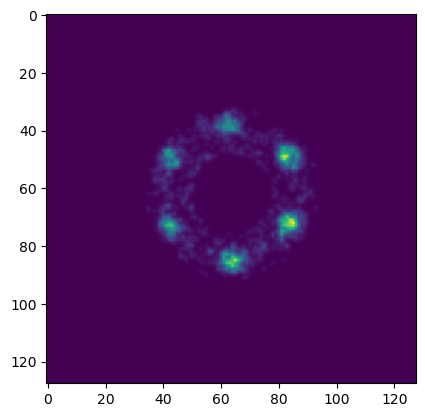

In [46]:
# artificially creating two domains (visualized)

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

angle = 30
angles = list(np.arange(0,361,60))

def rotate_and_add(array, angle):
    rotated_array = rotate(array, angle, reshape=False)
    result = normalize_min_max(array + rotated_array)
    return result


im = rotate_and_add(intensity_data[168], 0)
plt.imshow(im)
plt.show()

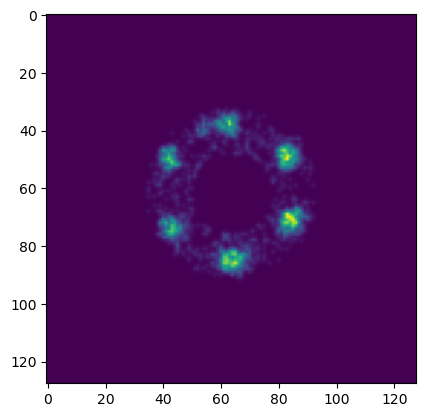

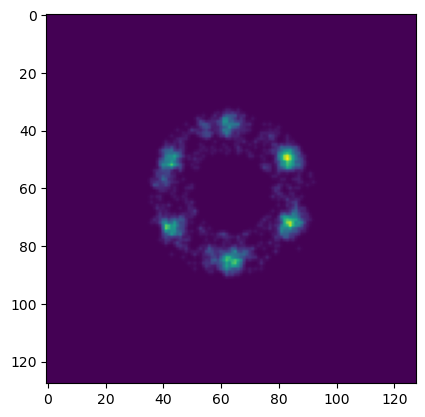

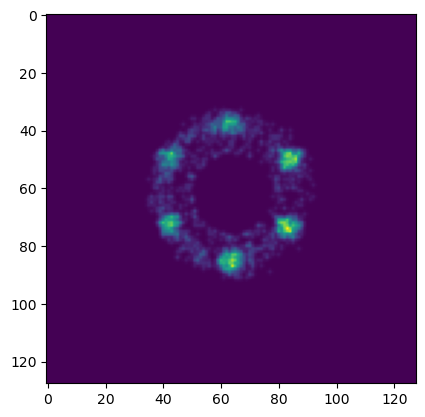

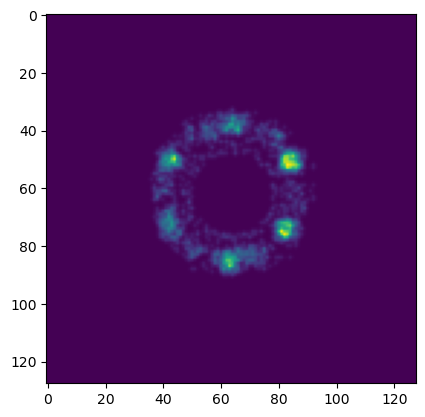

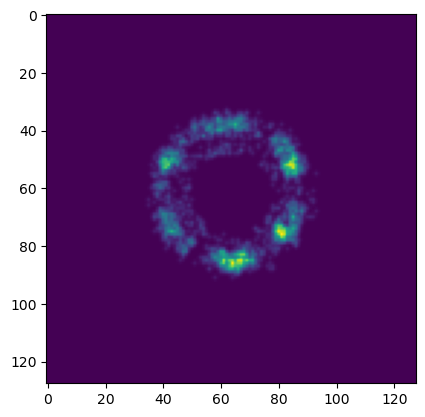

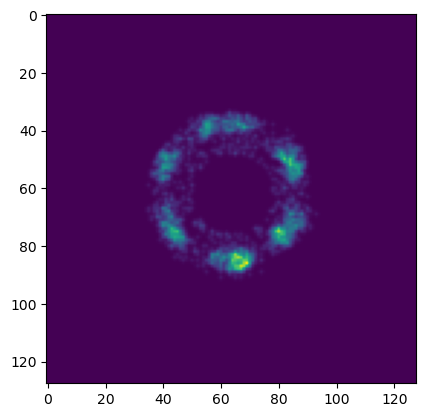

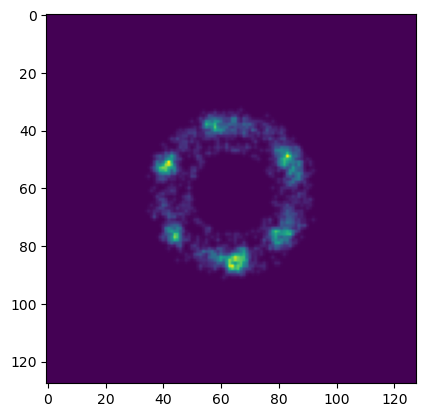

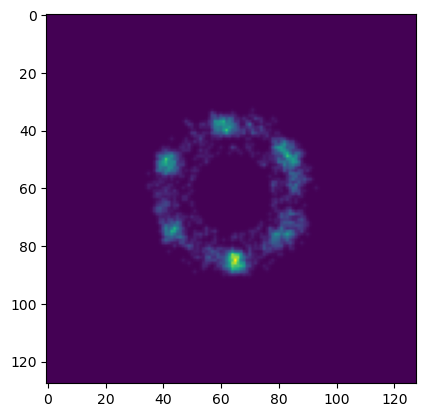

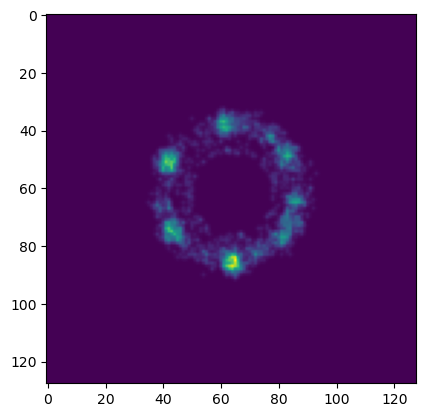

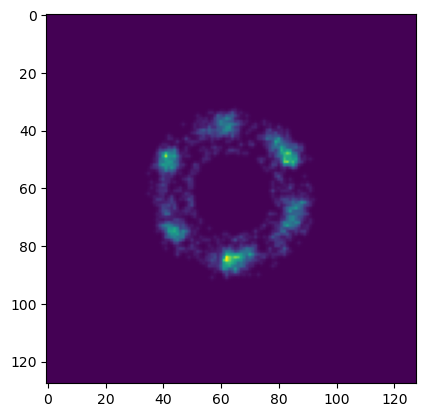

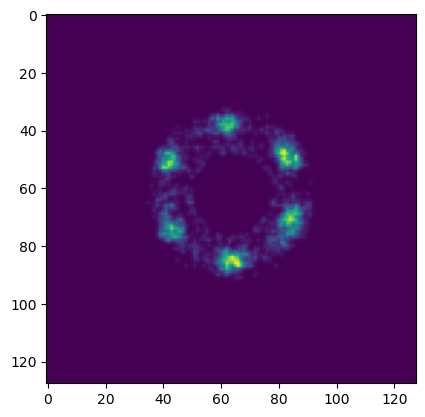

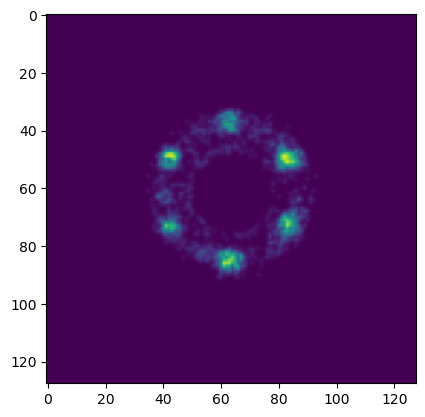

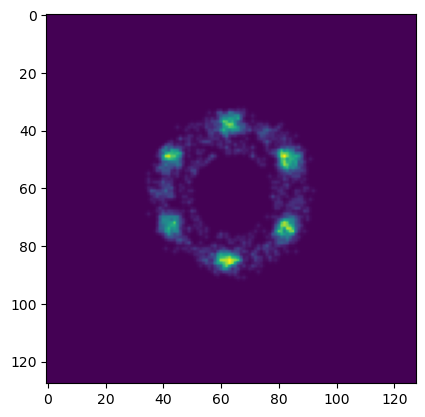

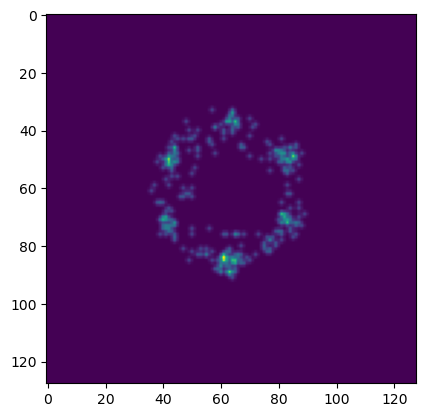

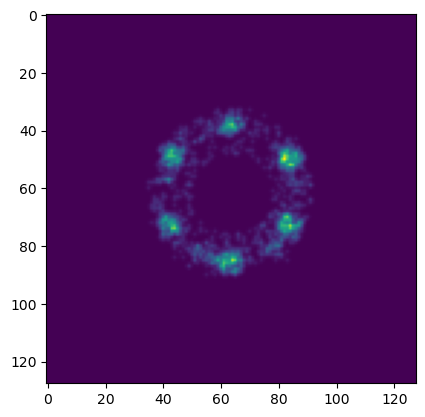

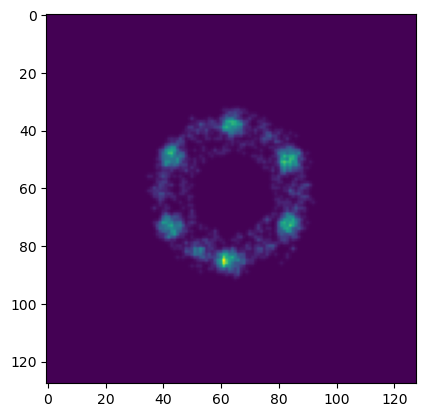

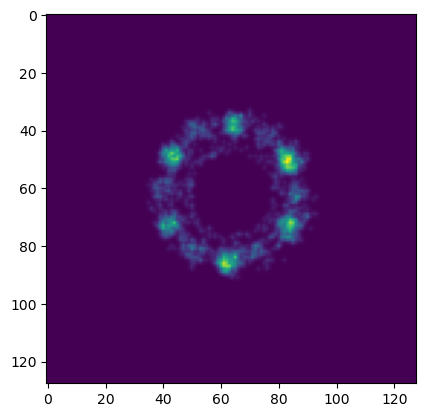

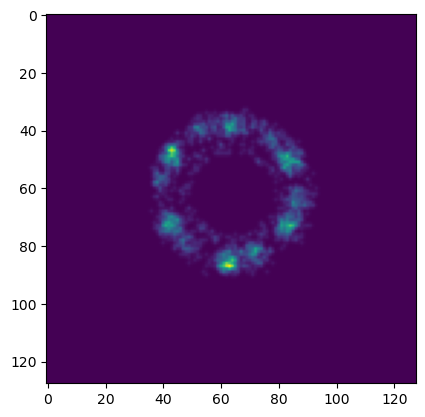

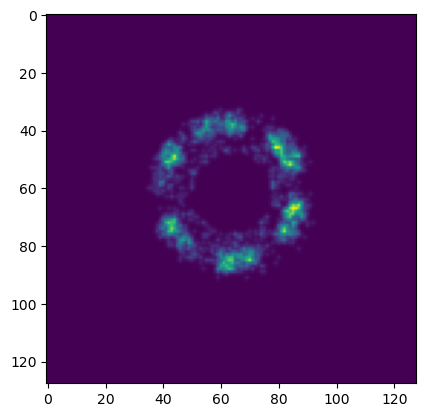

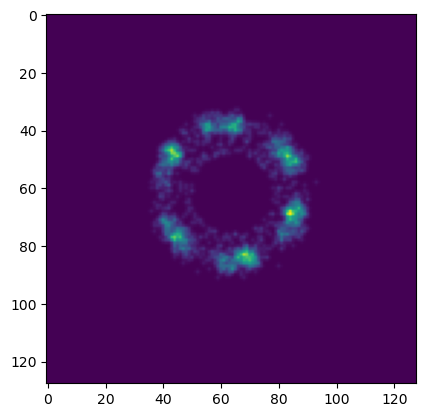

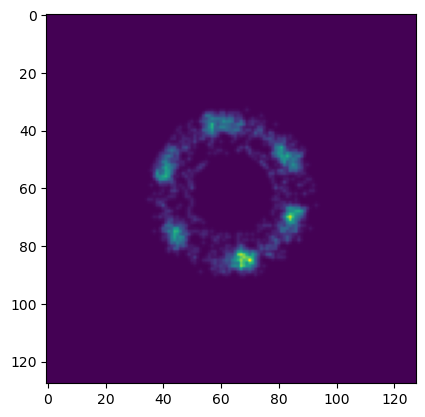

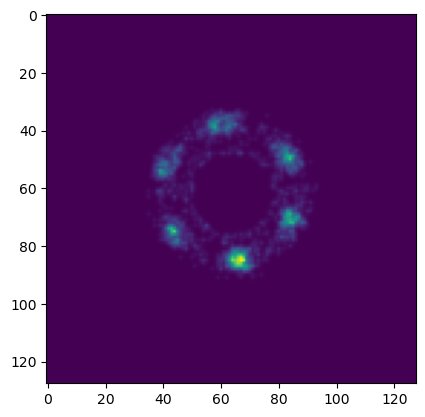

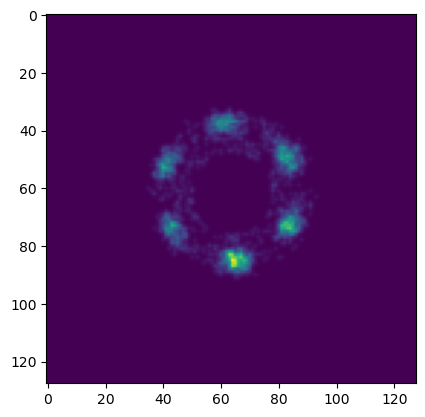

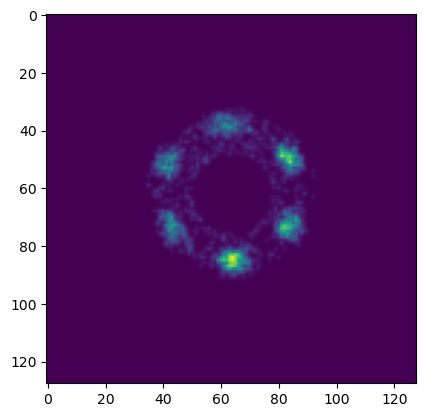

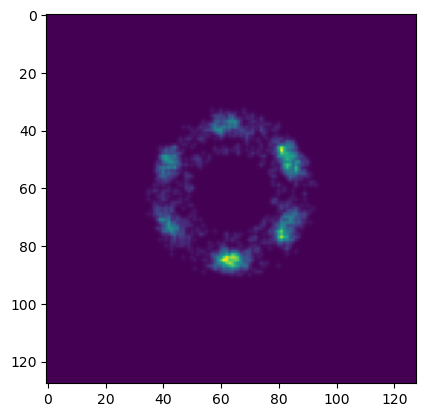

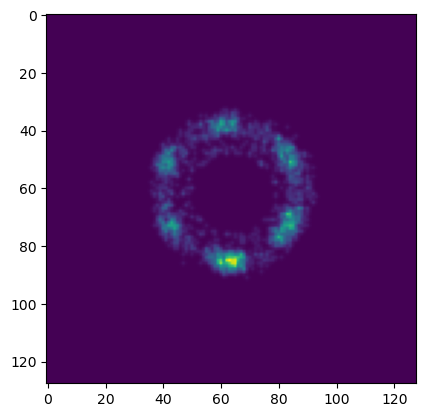

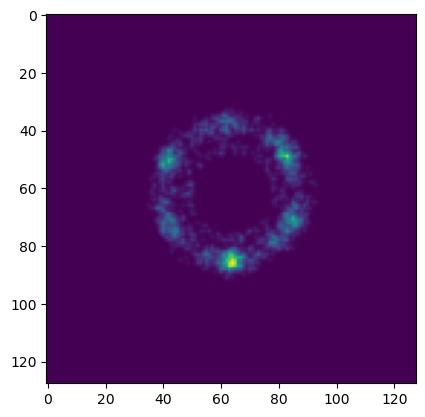

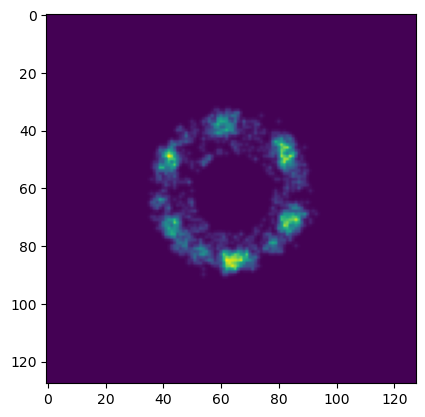

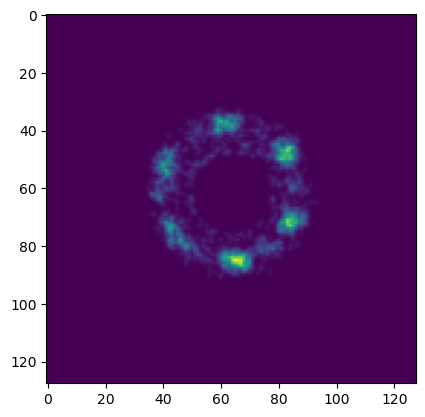

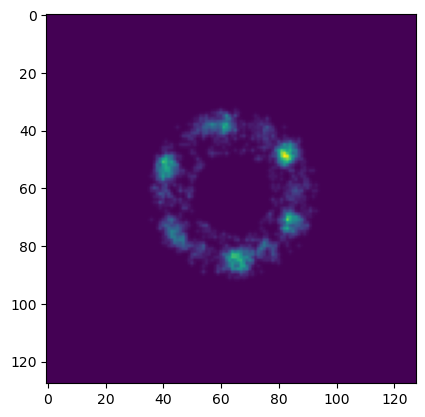

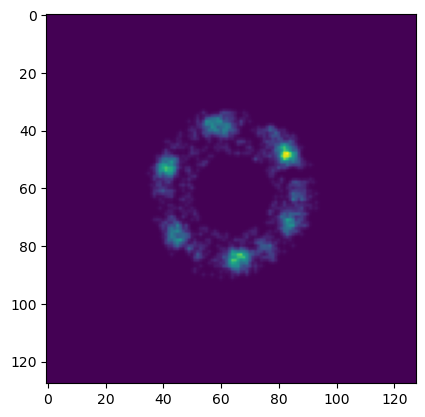

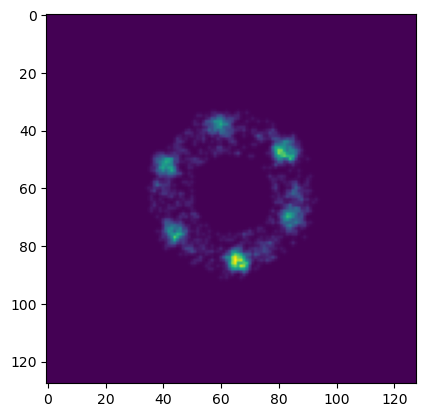

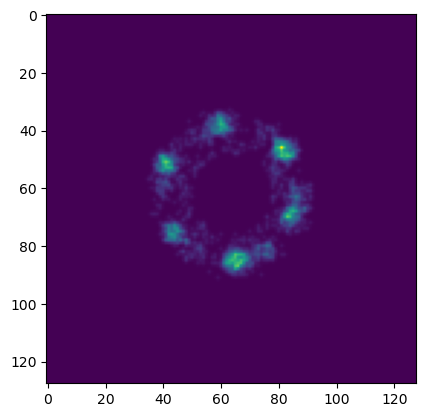

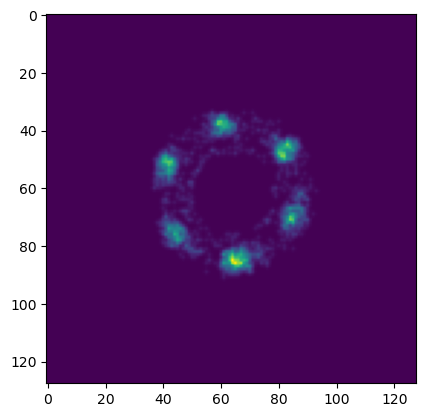

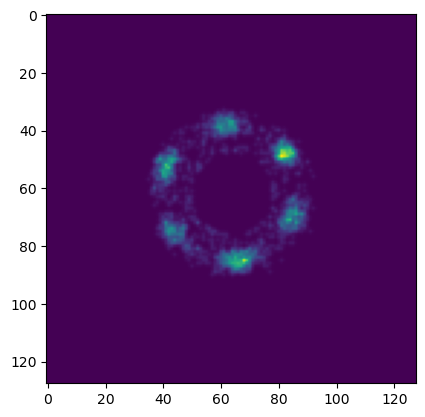

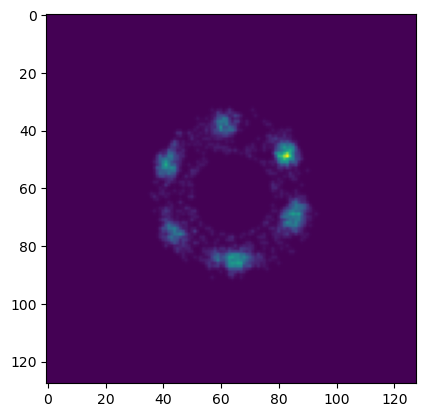

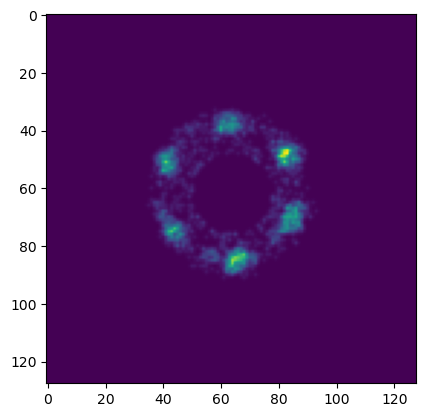

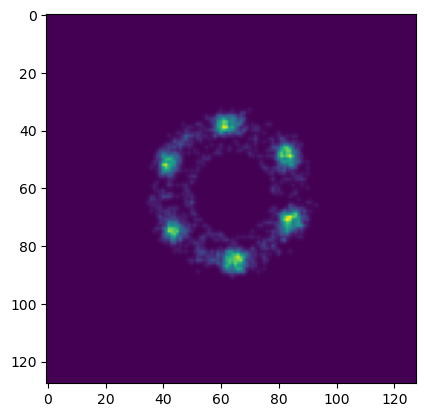

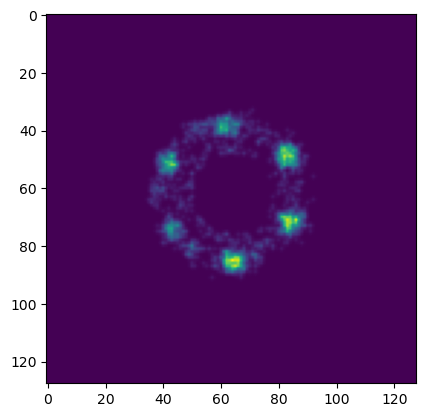

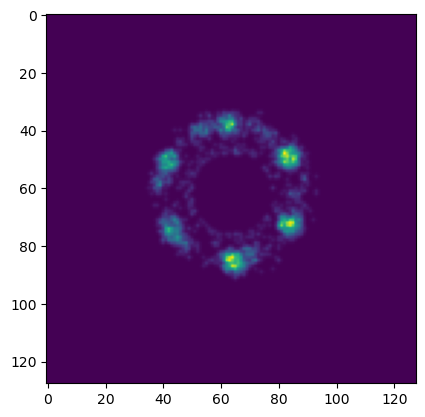

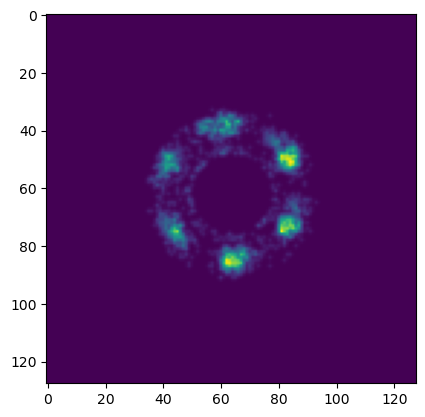

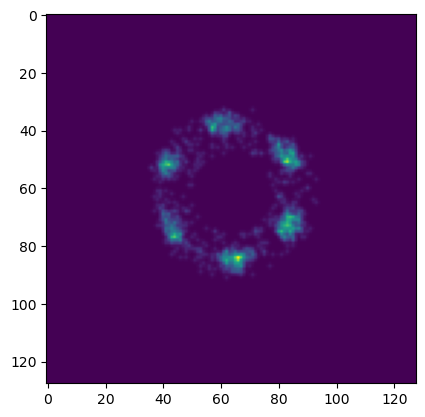

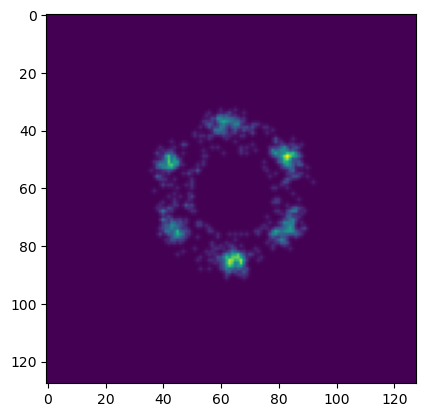

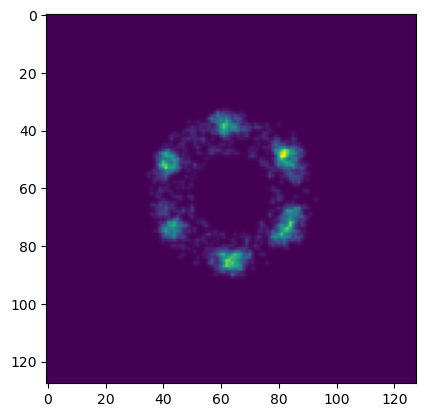

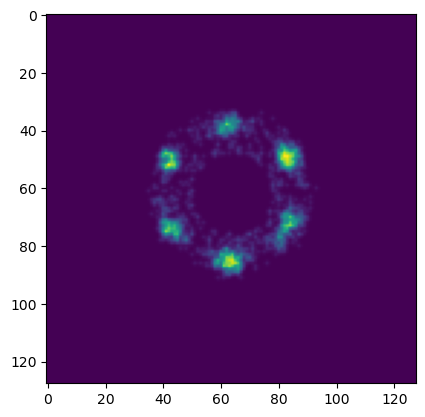

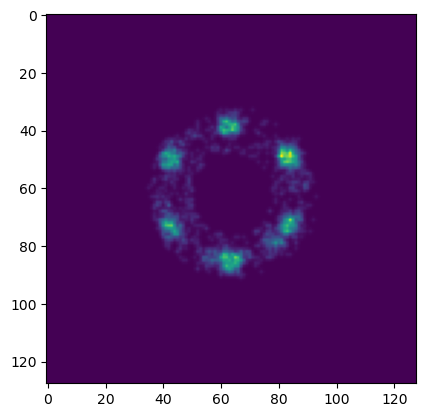

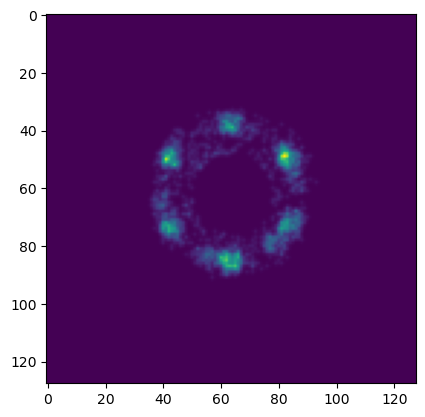

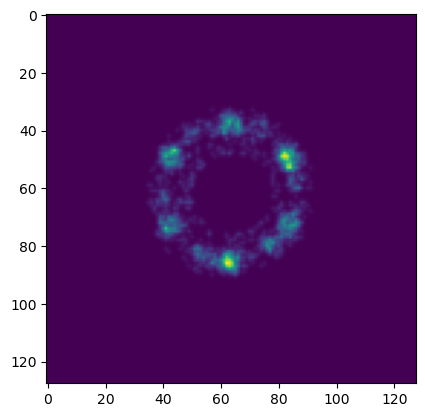

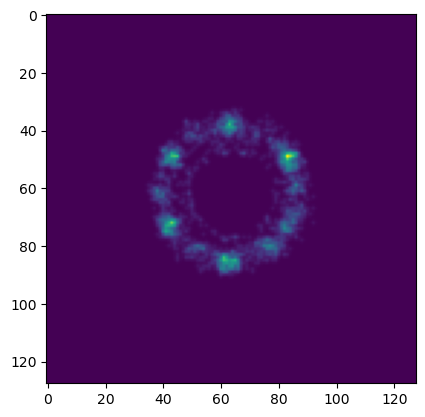

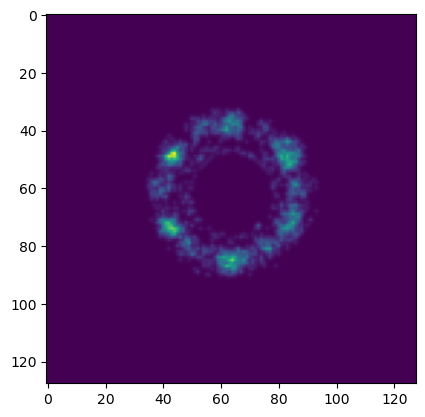

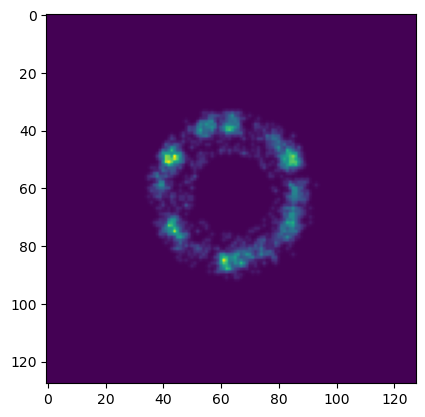

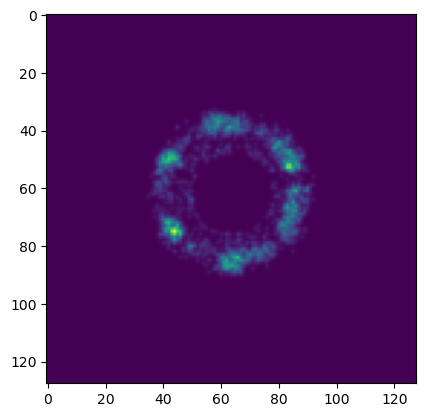

KeyboardInterrupt: 

In [29]:
# SAVE TRAINING DATA

for i in range(360):
    im = rotate_and_add(intensity_data[168], i)
    plt.imshow(im)
    plt.show()
    

np.savez('training_data.npz', array=array, )

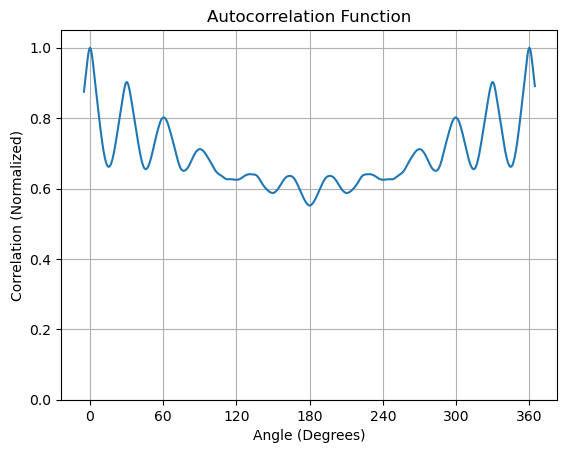

In [45]:
def single_autocorrelation_function(image, angle_step=0.5):
    """
    Computes the autocorrelation of an image by rotating it at different angles 
    and computing the correlation with the original image.
    
    Parameters:
        image (numpy array): Input image (2D array).
        angle_step (float): Step size for rotation angles. Default is 0.5 degrees.
        
    Returns:
        None: Displays a plot of autocorrelation versus angle.
    """
    # Define angle range
    angle_range = np.arange(-5, 365, angle_step)
    autocorr_vals = []

    # Loop over the range of angles
    for angle in angle_range:
        rotated_image = rotate(image, angle=angle, reshape=False)
        autocorr = rotated_image * image.numpy()
        autocorr_sum = np.sum(autocorr)
        autocorr_vals.append(autocorr_sum)

    # Convert to numpy array and normalize
    autocorr_vals = np.array(autocorr_vals)
    autocorr_norm = autocorr_vals / np.max(autocorr_vals)

    # Plot the autocorrelation function
    plt.plot(angle_range, autocorr_norm)
    plt.xlabel('Angle (Degrees)')
    plt.ylabel('Correlation (Normalized)')
    plt.ylim(0, 1.05)
    plt.xticks(np.arange(0, 361, 60))
    plt.title('Autocorrelation Function')
    plt.grid(True)
    plt.show()
    return

single_autocorrelation_function(im)

In [ ]:
# Add domains to list
domains_list = []

def domains_to_list(movie_df, angle=angle):
    
    for time in movie_df['time (s)']:
        plot_layered_SANS(angle, movie_df, time)
        
        while True:
            user_input = input('2 domains? yes, no, or unsure (y/n/u): ').strip().lower()

            if user_input == 'n':
                domains_list.append(1)
                print('1 added to list')
                break

            elif user_input == 'y':
                domains_list.append(2)
                print("2 added to list")
                break

            elif user_input == 'u':
                domains_list.append('drop')
                break

            else:
                print("Invalid input. Please enter y or n.")
                continue

    return print(domains_list)

# domains_to_list(df)

In [ ]:
# INITIALIZE AND CREATE LISTS
angle_list = [angle] * len(domains_list)

print("angle list length: ", len(angle_list))

# Add intensities to list
intensity_list = []

def intensities_to_list(movie_df, angle=angle):
    for time in movie_df['time (s)']:
        data = layered_SANS_data(angle, movie_df, time)
        intensity_list.append(data)
    return intensity_list

print("intensity list length: ", len(intensities_to_list(df)))

# Add numors to list
numor_list = []

def numors_to_list(movie_df):
    for numor in movie_df['Numors']:
        numor_list.append(numor)
    return numor_list

print("numor list length: ", len(numors_to_list(df)))

# Add time to list
time_list = []

def time_to_list(movie_df):
    for time in movie_df['time (s)']:
        time_list.append(time)
    return time_list

print("time list length: ", len(time_to_list(df)))

angle list length:  0
intensity list length:  60
numor list length:  60
time list length:  60


In [ ]:
# training data to dataframe

data = {
    'intensity arrays': intensity_list,
    'time stamp': time_list,
    'number of domains': domains_list,
    'numor': numor_list,
    'rotation angle': angle_list
}

training_data = pd.DataFrame(data)
training_data[training_data['number of domains'] != 'drop']

file_name = f'56.5K_neg_{angle}deg_train.xlsx'

def save_data():
    while True:
        user_input = input('save data? (y/n): ').strip().lower()

        if user_input == 'y':
            training_data.to_excel(file_name, index=False)
            print(f'file saved as {file_name}')
            break

        elif user_input == 'n':
            print('file not saved')
            break

        else:
            print("Invalid input")

    return

save_data()

ValueError: All arrays must be of the same length